In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape
type(train_images) #grayscale images

numpy.ndarray

In [5]:
train_images[0,23,23]
print(train_images[0:])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

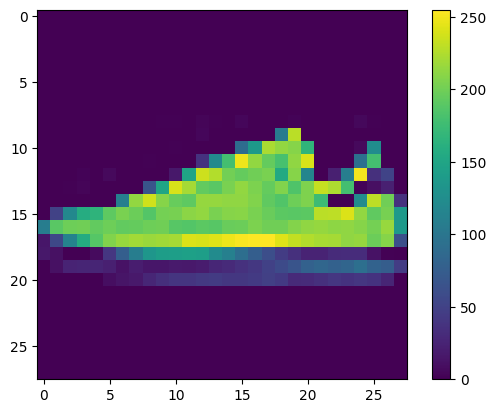

In [8]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# sqish all values between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # input layer
    keras.layers.Dense(128,activation='relu'), #hidden layer
    keras.layers.Dense(10,activation="softmax") # output layer
])

In [11]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)



In [26]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.8954
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2686 - accuracy: 0.9015
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2588 - accuracy: 0.9035
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2490 - accuracy: 0.9072
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2415 - accuracy: 0.9092


In [13]:
test_loss , test_acc = model.evaluate(test_images,test_labels, verbose = 1)
print("test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8730
test accuracy:  0.8730000257492065


In [14]:
predictions= model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Trouser


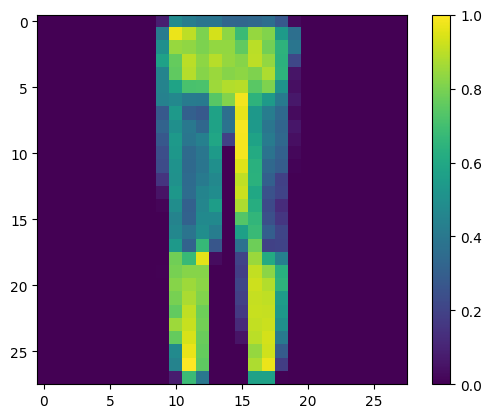

In [18]:
print(class_names[np.argmax(predictions[3])])
plt.figure()
plt.imshow(test_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 36ms/step
original image: Sneaker
Guessed image:  Sneaker


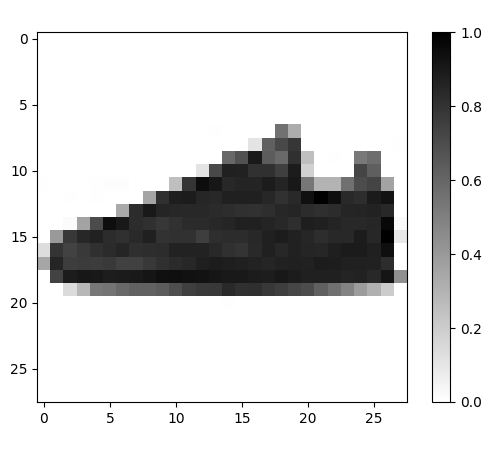

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  print("original image:", label)
  print("Guessed image: ", guess)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]

label = test_labels[num]


predict(model, image, label)